In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
#
in_data = loadmat('bucky.mat')
A = in_data['A']

rows, cols = np.array(A.shape)

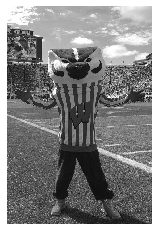

In [2]:
# Display image
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(A,cmap='gray')
ax.set_axis_off()
plt.show()

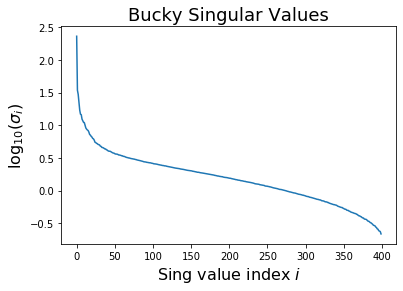

In [5]:
# Bucky's singular values

# Complete and uncomment line below
U,s,VT = np.linalg.svd(A,full_matrices=True)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(s))
ax.set_xlabel('Sing value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Bucky Singular Values', fontsize=18)
plt.show()

## 2a
It appears that rank-50 approximation would be a good fit.
Becasue it compresses the vertical axis.

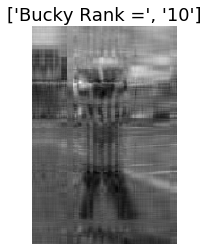

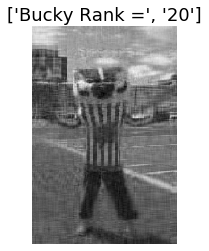

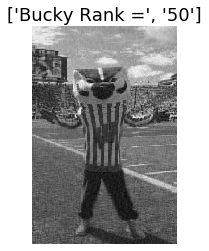

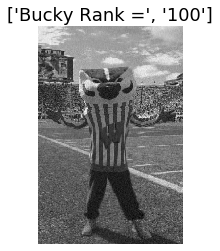

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


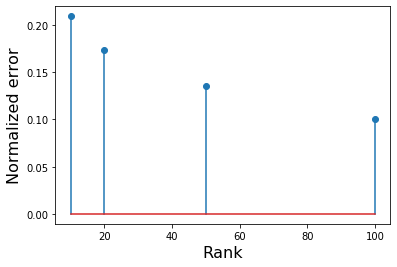

In [14]:
# Find and display low-rank approximations

r_vals = np.array([10, 20, 50, 100 ])
err_fro = np.zeros(len(r_vals))

# display images of various rank approximations
for i in range(len(r_vals)):
   
    ind = int(r_vals[i]-1)
    # Complete and uncomment two lines below
    Ar = U[:, :ind] @ np.diag(s[:ind]) @ VT[0:ind, :]
    Er = A - Ar
    err_fro[i] = np.linalg.norm(Er,ord='fro')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(Ar,cmap='gray',interpolation='none')
    ax.set_axis_off()
    ax.set_title(['Bucky Rank =', str(r_vals[i])], fontsize=18)
    plt.show()
    
# plot normalized error versus rank
norm_err = err_fro/np.linalg.norm(A,ord='fro')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(r_vals,norm_err)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('Normalized error', fontsize=16)
plt.show()

## 2c
As r increases from 10 to 50, the improvement in quality is significant.

As r incrasses from 50 to 100, the improvoment in quality is marginal.

## 2d


In [19]:
full_rank_sq = 400**2;
r_vals_sq = np.square(r_vals)
storage_perc = r_vals_sq * (full_rank_sq**-1)
print("Percentage of storage: ", storage_perc)

Percentage of storage:  [0.000625 0.0025   0.015625 0.0625  ]


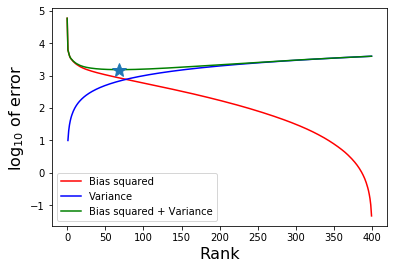

In [22]:
# bias-variance tradeoff
num_sv = min(rows, cols)
bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2

sigma2 = 10
var = sigma2*ranks
# print(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()

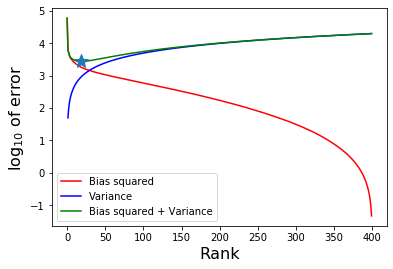

In [23]:
# bias-variance tradeoff
num_sv = min(rows, cols)
bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2

sigma2 = 50
var = sigma2*ranks
# print(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()